<a href="https://colab.research.google.com/github/Ssergeymiss/ComputerVision/blob/main/Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname,_,filenames in os.walk('/kaggle/Input'):
  for filenames in filenames:
     os.path.join(dirname, filename)

In [3]:
import matplotlib.pyplot as plt 
from PIL import Image

In [4]:
dir = "/content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset"
test_dir = os.path.join("/content/faces_splited/test") 
train_dir =os.path.join("/content/faces_splited/train") 
val_dir =os.path.join("/content/faces_splited/val") 

In [6]:
! pip install kaggle
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
!pip install opendatasets

import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 380M/380M [00:22<00:00, 17.9MB/s]


In [7]:
!pip install split-folders 
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:

input_folder="/content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset"
splitfolders.ratio(input_folder, 'faces_splited', ratio = (0.65, 0.2, 0.15), seed=1337, group_prefix=None)


Copying files: 33984 files [00:06, 5333.33 files/s]


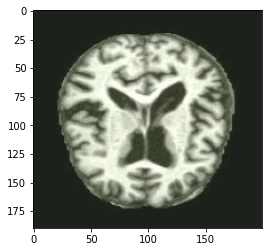

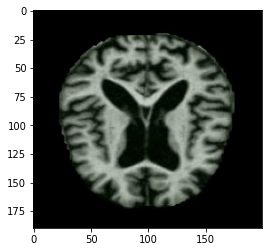

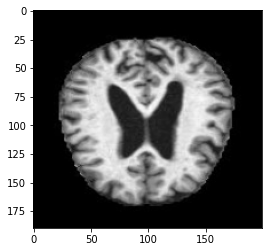

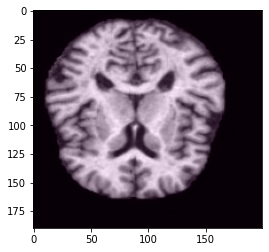

In [9]:
categ = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
for ca in categ:
    path = os.path.join(train_dir,ca)
    for img in os.listdir(path):
        img_arr =Image.open(os.path.join(path,img)) 
        #img_arr=img_arr.crop((25,25,175,175))
        arr = np.array(img_arr)
        plt.imshow(np.array(img_arr),cmap='gray')
        plt.show()
        break

<class 'numpy.ndarray'>
(190, 200, 3)


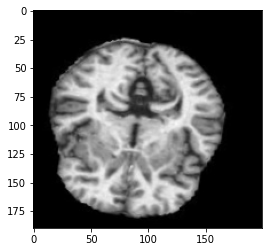

In [10]:
cart='MildDemented'
pyt=os.path.join(train_dir,cart)
img_arr=Image.open(os.path.join(path,os.listdir(path)[1005]))
img_arr=np.array(img_arr)
print(type(img_arr))
print(img_arr.shape)
plt.imshow(img_arr,cmap="gray")

In [11]:


  for ca in categ:
    
       
    
    path=os.path.join(dir,ca)
    class_num=categ.index  
    print(categ.index)  

<built-in method index of list object at 0x7f00162aabc0>
<built-in method index of list object at 0x7f00162aabc0>
<built-in method index of list object at 0x7f00162aabc0>
<built-in method index of list object at 0x7f00162aabc0>


In [12]:

def create_data(my_list,categ,my_dir):
  image_size=150
  for ca in categ:
    
       
    print(ca)
    path=os.path.join(my_dir,ca)
    class_num=categ.index
    print(class_num)
    for img in os.listdir(path):#listdir - список файлов
      try:#Это-а хуета называется исключением, если не получается ресшейпнуть фотку, то мы ее пропускаем
        #print(ca)
        img_arr=Image.open(os.path.join(path,img)).convert("L")
        new_image=img_arr.resize((image_size,image_size))
        new_image=np.asarray(new_image)#переводим входные данные в массив
        #arr=new_image.reshape(150,150,1)
        arr=new_image.reshape(150,150,1)
        if ca == "MildDemented":
          my_list.append([arr,0])
        if ca == "ModerateDemented":
          my_list.append([arr,1])
        if ca == "NonDemented":
          my_list.append([arr,2])
        if ca == "VeryMildDemented":
          my_list.append([arr,3])
       # print(type(class_num))
        
          
      except Exception as e:
        e=e
print(categ.index)
train_list = []
test_list = []
val_list = []
create_data(train_list,categ,train_dir)

<built-in method index of list object at 0x7f00162aabc0>
MildDemented
<built-in method index of list object at 0x7f00162aabc0>
ModerateDemented
<built-in method index of list object at 0x7f00162aabc0>
NonDemented
<built-in method index of list object at 0x7f00162aabc0>
VeryMildDemented
<built-in method index of list object at 0x7f00162aabc0>


In [13]:
import random

In [14]:
create_data(test_list,categ,test_dir)
create_data(val_list,categ,val_dir)

MildDemented
<built-in method index of list object at 0x7f00162aabc0>
ModerateDemented
<built-in method index of list object at 0x7f00162aabc0>
NonDemented
<built-in method index of list object at 0x7f00162aabc0>
VeryMildDemented
<built-in method index of list object at 0x7f00162aabc0>
MildDemented
<built-in method index of list object at 0x7f00162aabc0>
ModerateDemented
<built-in method index of list object at 0x7f00162aabc0>
NonDemented
<built-in method index of list object at 0x7f00162aabc0>
VeryMildDemented
<built-in method index of list object at 0x7f00162aabc0>


In [15]:
random.shuffle(train_list, random.random)
random.shuffle(test_list, random.random)
random.shuffle(val_list, random.random)

In [16]:
len(test_list)

5099

In [17]:
def split_data(X,y,my_list):
  image_size=150
  for fe,la in my_list:#Здесь мы переносим в две переменные данные из датасетов
    #fe-features,la-label
    print(la)
    X.append(fe)
    y.append(la)
    
  X=np.array(X).reshape(-1,image_size,image_size,1)

In [18]:
X_train = []
y_train = []
X_test = []
y_test = []
X_val = []
y_val = []
split_data(X_train, y_train, train_list)

Выходные данные были обрезаны до нескольких последних строк (5000).
0
3
2
3
2
0
2
2
0
1
2
0
2
3
2
1
1
2
2
0
1
1
0
2
2
1
2
3
3
3
3
3
0
0
3
2
0
2
1
2
1
0
1
2
3
0
0
1
0
3
0
0
3
2
1
2
3
2
0
3
2
1
0
0
2
3
2
0
0
1
1
2
2
0
1
3
1
3
2
1
3
0
2
0
0
0
1
3
2
2
1
0
3
3
2
0
3
2
1
1
0
0
0
3
0
2
1
2
3
2
1
0
1
1
1
2
2
0
2
3
3
1
3
0
3
0
1
1
3
3
1
3
2
3
3
1
3
0
3
0
2
1
2
2
2
0
3
2
0
2
0
1
2
3
1
0
3
0
2
3
0
1
1
2
3
3
2
2
0
3
0
3
0
2
1
1
0
1
1
3
2
3
3
3
1
3
0
1
1
0
1
3
1
3
2
3
2
2
2
0
0
2
0
1
0
2
3
0
1
3
1
1
2
1
2
0
3
2
0
3
0
2
2
1
2
2
3
1
2
0
0
3
3
0
2
3
3
2
0
0
0
3
0
0
0
3
3
0
2
1
2
1
0
2
3
2
0
0
1
0
2
3
3
0
2
3
0
3
3
3
3
2
3
3
2
1
1
3
3
2
0
0
2
2
3
2
3
2
0
0
0
2
2
0
0
2
1
1
3
1
0
1
3
3
3
1
0
3
3
3
1
1
3
1
1
3
0
2
3
2
0
0
3
3
2
1
0
3
2
3
2
2
1
2
0
2
0
0
1
1
3
0
3
2
0
1
2
0
1
1
3
0
1
0
3
0
3
1
2
0
0
0
3
2
3
3
1
3
3
0
1
0
2
1
2
3
0
2
3
0
0
0
2
1
2
1
0
1
3
3
2
2
0
0
3
3
2
2
2
2
1
2
2
1
1
0
3
3
2
2
3
3
0
2
2
0
0
2
2
2
1
1
2
3
3
3
3
2
1
0
0
2
0
0
2
3
2
0
3
1
0
3
0
3
3
2
1
3
0
0
2
1
0
3
2
0
1
0
1
3
2
0
3
0
3
0


In [19]:
for i in range(len(y_train[:1000])):
  if(y_train[i])==2:
    print(i)


0
7
13
18
21
24
32
33
34
35
37
38
45
46
47
49
54
56
57
59
61
63
67
68
70
75
77
81
82
86
88
94
95
98
100
102
104
107
115
119
122
125
138
140
144
145
148
151
154
155
156
158
164
165
169
171
174
177
182
183
184
185
188
192
195
199
201
209
211
213
225
226
231
235
242
243
246
251
254
255
256
257
258
264
265
270
275
277
279
280
288
291
292
293
295
297
299
300
301
304
307
308
310
315
322
330
332
334
336
337
338
343
348
349
351
354
357
363
366
367
371
376
377
378
383
385
387
395
397
398
401
402
408
410
414
415
416
419
421
423
424
429
431
432
437
439
442
446
447
448
456
457
460
461
463
465
467
468
469
470
472
478
487
488
494
495
498
500
502
508
513
518
521
522
525
529
530
534
535
536
538
543
545
547
549
553
566
567
574
576
577
581
583
584
589
595
596
601
604
609
610
613
620
622
624
627
634
636
639
647
652
657
659
664
666
671
673
678
681
682
697
700
704
710
711
716
721
722
723
725
729
732
737
739
743
744
745
747
751
752
759
762
770
771
773
775
776
780
784
785
788
792
797
801
804
814
815
817
818


In [20]:
split_data(X_test, y_test, test_list)
split_data(X_val, y_val, val_list)

Выходные данные были обрезаны до нескольких последних строк (5000).
2
3
1
1
3
3
2
2
3
1
1
1
2
1
2
0
0
2
2
3
1
3
0
0
3
0
2
2
3
2
3
3
2
0
2
0
3
0
3
2
3
1
2
3
1
0
3
1
3
2
2
2
2
1
2
3
3
3
0
2
3
3
0
3
2
0
2
2
3
1
3
1
0
0
0
2
1
1
1
0
3
3
2
0
3
0
2
2
0
3
0
0
0
2
2
3
3
1
0
0
0
3
1
3
1
2
0
1
1
1
0
2
0
2
0
1
2
1
1
2
3
2
3
2
0
2
3
2
1
3
3
2
3
3
2
0
2
2
0
2
1
1
3
2
3
3
0
1
0
2
3
1
1
1
3
2
1
1
3
3
0
0
1
3
1
2
3
1
3
0
1
0
2
1
1
0
3
3
0
1
3
0
0
3
3
2
2
2
3
0
3
0
0
0
0
1
3
1
1
3
0
3
3
0
3
0
2
2
0
2
2
3
2
0
0
3
0
3
3
0
1
0
2
3
0
2
0
3
0
1
3
3
0
2
3
0
3
1
0
2
2
0
3
0
0
2
3
1
0
2
0
2
1
3
0
1
1
2
1
3
1
3
2
2
3
2
1
0
2
3
0
1
1
0
1
2
3
1
0
3
2
1
2
2
1
3
3
3
1
2
2
1
2
1
3
3
0
2
1
1
2
1
2
2
0
1
2
1
1
3
3
0
3
1
0
1
0
2
3
0
2
1
2
2
1
3
0
1
1
2
3
1
3
0
3
2
3
2
3
1
0
3
1
3
1
2
0
1
0
2
0
2
1
0
2
0
2
0
2
3
3
1
3
2
3
3
0
3
0
1
3
2
1
1
2
0
2
3
3
2
2
0
3
0
0
3
2
2
2
2
2
2
3
2
3
0
2
3
2
0
3
1
3
2
0
2
0
3
3
2
3
0
3
2
2
3
0
2
3
3
1
0
1
1
2
0
2
1
2
1
1
0
0
2
3
0
2
2
0
0
1
2
1
0
1
0
0
3
3
3
0
3
1
3
0
0
0
3
2
2
3
2
3
2
2
2


In [ ]:
X_train[0]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [21]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

In [ ]:
type(y_train[0])

numpy.int64

In [22]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

In [23]:
!pip install keras
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(22089, 150, 150, 1)
(5099, 150, 150, 1)
(6796, 150, 150, 1)


In [25]:
import keras
import numpy as np
import sklearn.model_selection
from keras import layers
from keras import models 
!pip install keras_visualizer 
from keras_visualizer import visualizer 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, GlobalMaxPooling2D
inputs=keras.Input(shape=(150,150,1))
from keras import regularizers
from keras.utils import to_categorical

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:

x = tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal')(inputs)
x = tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.20, width_factor=0.20)(x)
x = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.09)(x)

# def res_net_block(input_data, filters, conv_size):
#     x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(input_data)
#     x = layers.BatchNormalization()(x)
#     x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Add()([x, input_data])
#     x = layers.Activation('relu')(x)
#     return x

# model itself
#x = keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(150, 150, 1), padding='same', activation="relu")(x)
#x=layers.MaxPooling2D()(x)
#x = layers.BatchNormalization()(x)
#x = keras.layers.Conv2D(filters=256, kernel_size=3, input_shape=(150,150, 1), padding='same', activation="relu")(x)
#x=layers.MaxPooling2D()(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(128,128, 1), padding='same', activation="relu")(x)
x=layers.MaxPooling2D()(x)
#x=keras.layers.Dropout(0.5)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, input_shape=(64, 64, 1), padding='same', activation="relu")(x)
x=layers.MaxPooling2D()(x)

#x = keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(64, 64, 1), padding='same', activation="relu")(x)
#x=layers.MaxPooling2D()(x)

#x=keras.layers.Dropout(0.25)(x)

#num_res_net_blocks = 18
#for i in range(num_res_net_blocks):
   # x = res_net_block(x, 32, 5)
#x = layers.Dropout(0.5)(x)
#for i in range(num_res_net_blocks):
    #x = res_net_block(x, 32, 5)
x = layers.Conv2D(25, 3, activation='relu')(x)
x = layers.GlobalMaxPooling2D()(x)
x= layers.Flatten()(x)

#x=keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(128, activation='tanh')(x)
#x = keras.layers.Dense(128, activation='tanh',kernel_initializer='ones',
    #kernel_regularizer=tf.keras.regularizers.L1(0.05),
    #activity_regularizer=tf.keras.regularizers.L2(0.05))(x)
#x = layers.BatchNormalization()(x)
#x=keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(64, activation='tanh')(x)#,kernel_regularizer=tf.keras.regularizers.L1(0.01),
    #activity_regularizer=tf.keras.regularizers.L2(0.01))(x)



x = keras.layers.Dense(32, activation='tanh')(x)

outputs = layers.Dense(4, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary() 
#visualizer(model, format='png', view=True)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 150, 150, 1)       0         
                                                                 
 random_translation_2 (Rando  (None, 150, 150, 1)      0         
 mTranslation)                                                   
                                                                 
 random_rotation_2 (RandomRo  (None, 150, 150, 1)      0         
 tation)                                                         
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 150, 128)     1280      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 128)      0   

In [36]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    ),
              metrics=['accuracy'])

In [30]:
%load_ext tensorboard
import datetime

In [31]:
rm -rf ./logs/

In [32]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
y_train=y_train.to_categorical(Y)

AttributeError: ignored

In [ ]:
y_train[51]

2

In [ ]:
X_train[1000:2000].shape

(1000, 150, 150, 1)

In [ ]:
model.load_weights("my_model_weights_adaGrad.h5")

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)

In [38]:
history=model.fit(X_train[1000:4000], y_train[1000:4000], epochs=150, batch_size=40, validation_data=(X_test,y_test), callbacks=[tensorboard_callback,early_stop])

Epoch 1/150


75/75 [==============================] - 32s 337ms/step - loss: 1.3749 - accuracy: 0.2840 - val_loss: 1.3765 - val_accuracy: 0.2844
Epoch 2/150
75/75 [==============================] - 23s 310ms/step - loss: 1.3583 - accuracy: 0.2993 - val_loss: 1.3417 - val_accuracy: 0.2914
Epoch 3/150
75/75 [==============================] - 23s 310ms/step - loss: 1.2473 - accuracy: 0.3927 - val_loss: 1.1483 - val_accuracy: 0.4638
Epoch 4/150
75/75 [==============================] - 23s 304ms/step - loss: 1.1770 - accuracy: 0.4310 - val_loss: 1.1049 - val_accuracy: 0.4860
Epoch 5/150
75/75 [==============================] - 23s 307ms/step - loss: 1.1398 - accuracy: 0.4687 - val_loss: 1.0528 - val_accuracy: 0.5217
Epoch 6/150
75/75 [==============================] - 24s 316ms/step - loss: 1.0786 - accuracy: 0.4913 - val_loss: 1.0194 - val_accuracy: 0.5172
Epoch 7/150
75/75 [==============================] - 23s 310ms/step - loss: 1.0671 - accuracy: 0.4960 - val_loss: 1.0210 - val_accuracy: 0.5183
Epoc

In [39]:
model.save_weights('my_model_weights_adaGrad.h5')

In [40]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

In [ ]:
y_val[1145:1149]

In [ ]:
model.predict(np.array(X_val[1145:1149]))

In [ ]:
model.evaluate(X_val,y_val) 

In [ ]:
model_file = "top_model_alcGaym2.h5"
model.save(model_file)